![](apple.gif)

In [1]:
# http://scikit-image.org/

%matplotlib inline 

from __future__ import print_function
# these imports let you use opencv
import cv2          # opencv itself
import numpy as np  # matrix manipulations
from matplotlib import pyplot as plt           # this lets you draw inline pictures in the notebooks
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

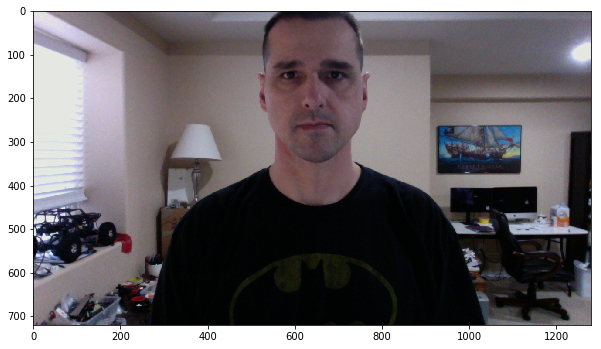

In [2]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
if ret:
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)

cap.release()

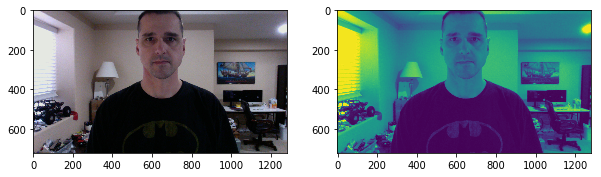

In [29]:
img = frame.copy()

# convert our image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(gray)

# load the haar face detector for the front
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

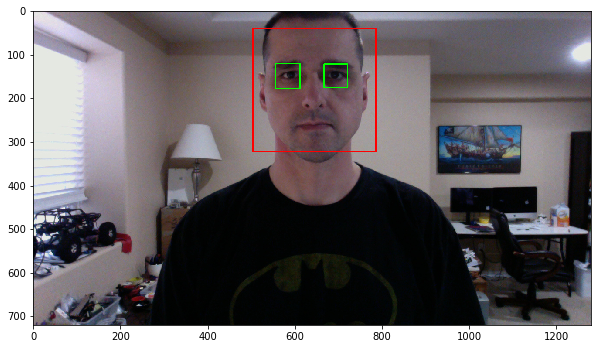

In [31]:
plt.imshow(img);

Faces found: 1


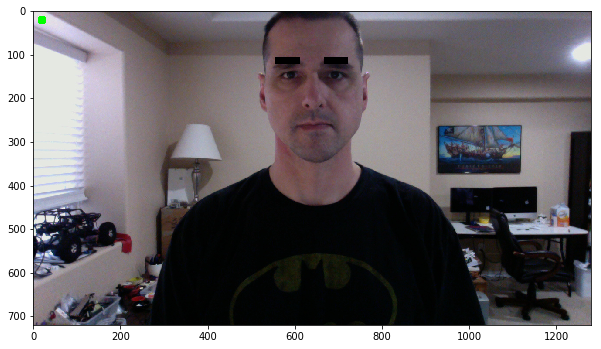

In [57]:
class Brows(object):
    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
        self.eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    def draw(self, img, color=(0,0,0)):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            for (ex,ey,ew,eh) in eyes:
#                 w = int(.1*(ex+ew))
                w = 15
                ul = (ex,ey)
                lr = (ex+ew,ey-w)
                cv2.rectangle(roi_color,ul,lr,color,-1)
        
        # updae marker: green - faces, red - none
        if len(faces) > 0 :
            mcolor = (0,255,0)
            print('Faces found:', len(faces))
        else:
            mcolor = (255,0,0)
            print('No faces found')
            
        cv2.circle(img, (20,20), 10, mcolor, -1)
        return img
    
ub = frame.copy()
brows = Brows()
ub = brows.draw(ub)
plt.imshow(ub);

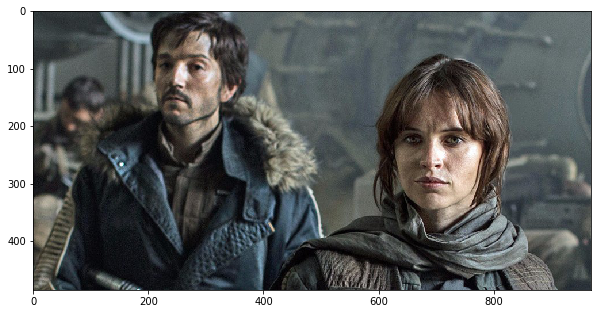

In [58]:
rogue = cv2.imread('rogue-one.jpg')
rogue = cv2.cvtColor(rogue, cv2.COLOR_BGR2RGB)
plt.imshow(rogue);

Faces found: 2


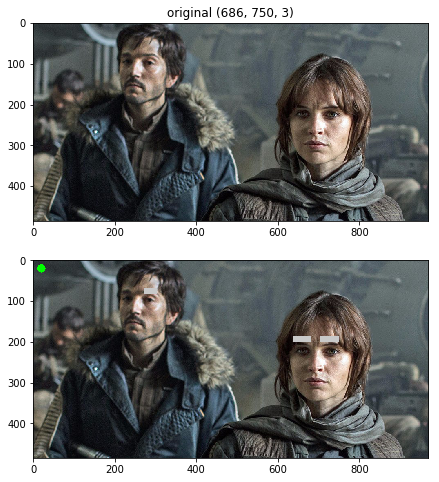

In [65]:
rogue = cv2.imread('rogue-one.jpg')
rogue = cv2.cvtColor(rogue, cv2.COLOR_BGR2RGB)

plt.subplot(2,1,1)
plt.imshow(rogue)
plt.title('original {}'.format(ds.shape))

ro = brows.draw(rogue, color=(200,200,200))
plt.subplot(2,1,2)
plt.imshow(ro);

No faces found


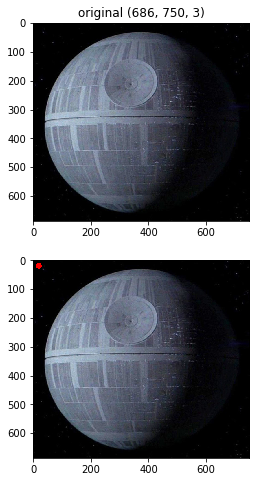

In [66]:
ds = cv2.imread('death-star.jpg')
ds = cv2.cvtColor(ds, cv2.COLOR_BGR2RGB)

plt.subplot(2,1,1)
plt.imshow(ds)
plt.title('original {}'.format(ds.shape))

dds = brows.draw(ds, color=(200,200,200))
plt.subplot(2,1,2)
plt.imshow(dds);

Faces found: 1


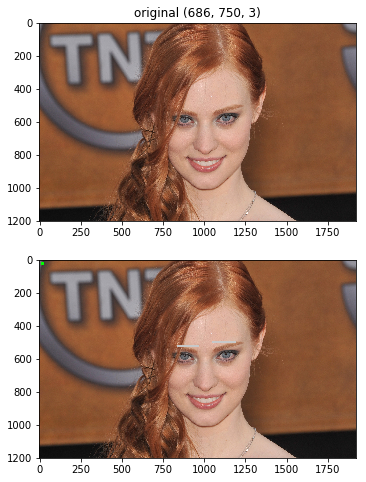

In [67]:
woll = cv2.imread('woll.jpg')
woll = cv2.cvtColor(woll, cv2.COLOR_BGR2RGB)

plt.subplot(2,1,1)
plt.imshow(woll)
plt.title('original {}'.format(ds.shape))

fwoll = brows.draw(woll, color=(200,200,200))
plt.subplot(2,1,2)
plt.imshow(fwoll);